## Data Cleaning Notebook
This notebook is to clean and normalize our data(steam.csv) to prepare for analysis

Produces a new csv with normalized and cleaned data.

1. Import Libraries
2. Load data
3. Check for duplicates and missing values and fill them in
4. Normalize numerical columns and write to a new csv file called steam_normalized.csv
5. create and calculate basic visualizations and statistics


### Import Libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# from matplotlib.pylab import rcParams


### Load Data (steam.csv()) and check for duplicates/missing values

In [139]:
df = pd.read_csv('steam.csv')
# print(df.head())

num_duplicates = df.duplicated().sum()
print("Number of duplicate rows: ", num_duplicates)

# Check for duplicates only in 'id'
id_duplicates = df.duplicated(subset=['appid']).sum()
print("num duplicate ID's", id_duplicates)

# Check for any null values
# is_null = df.isnull().any()
# print("Null values?: ", is_null)

rows_with_nulls = df[df.isnull().any(axis=1)]
# print(rows_with_nulls)

df['developer'] = df['developer'].fillna("Unkown")       # fill missing developer with Unknown
df['publisher'] = df['publisher'].fillna('Unkown/NA')            # fill missing publiser with Unkown/NA

rows_with_nulls = df[df.isnull().any(axis=1)]
# print(rows_with_nulls)
print("Number of null values: ", df.isnull().sum().sum())




Number of duplicate rows:  0
num duplicate ID's 0
Number of null values:  0


### Normalize Numerical Data
- Normalize by discretizing by cluster binning?
- Min Max Normalization?
- Z-score normalization?

In [140]:
# Any normalization coding

normalized_df = df.copy()  # make a copy of the df
normalized_df = normalized_df.drop('appid', axis=1)
numeric_cols = normalized_df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    mean = df[col].mean()
    mad = (df[col] - mean).abs().mean()
    normalized_df[col] = (df[col] - mean) / mad
    # normalized_df = normalized_df.drop(col, axis=1)
    # print("current col", col)

# print(normalized_df.head())
print(type(normalized_df['owners'][0]))

print(df['owners'].unique())
rank_map = {
    '0-20000': 11,
    '20000-50000': 10,
    '50000-100000': 9,
    '100000-200000': 8,
    '200000-500000': 7,
    '500000-1000000': 6,
    '1000000-2000000': 5,
    '2000000-5000000': 4,
    '5000000-10000000': 3,
    '10000000-20000000': 2,
    '20000000-50000000': 1
}

print(df['owners'].isnull().values.any())


normalized_df['owners_rank'] = normalized_df['owners'].map(rank_map)

normalized_df['appid'] = df['appid']
print(normalized_df.head(1))
# Write the normalized_df as a new file


<class 'str'>
['10000000-20000000' '5000000-10000000' '2000000-5000000'
 '20000000-50000000' '100000000-200000000' '50000000-100000000'
 '20000-50000' '500000-1000000' '100000-200000' '50000-100000'
 '1000000-2000000' '200000-500000' '0-20000']
False
             name release_date   english developer publisher  \
0  Counter-Strike   2000-11-01  0.509618     Valve     Valve   

           platforms  required_age  \
0  windows;mac;linux     -0.511254   

                                          categories  genres  \
0  Multi-player;Online Multi-Player;Local Multi-P...  Action   

            steamspy_tags  achievements  positive_ratings  negative_ratings  \
0  Action;FPS;Multiplayer      -0.70668         73.545027          9.179336   

   average_playtime  median_playtime             owners     price  \
0         70.588874         0.709761  10000000-20000000  0.242439   

   owners_rank  appid  
0          2.0     10  


In [141]:
df.to_csv("normalized_steam.csv", index=False)


### Data Summarization
Provide mean medain IQR etc

In [142]:
colors = [
    'blue',
    'green',
    'salmon',
    'gold',
    'plum',
    'skyblue',
    'tomato',
    'lightslategray',
    'khaki',
    'orchid',
    'peru'
]


        english  required_age  achievements  positive_ratings  \
count  27075.00      27075.00      27075.00          27075.00   
mean       0.98          0.35         45.25           1000.56   
std        0.14          2.41        352.67          18988.72   
min        0.00          0.00          0.00              0.00   
25%        1.00          0.00          0.00              6.00   
50%        1.00          0.00          7.00             24.00   
75%        1.00          0.00         23.00            126.00   
max        1.00         18.00       9821.00        2644404.00   

       negative_ratings  average_playtime  median_playtime     price  
count          27075.00          27075.00         27075.00  27075.00  
mean             211.03            149.80           146.06      6.08  
std             4284.94           1827.04          2353.88      7.87  
min                0.00              0.00             0.00      0.00  
25%                2.00              0.00             0.00 

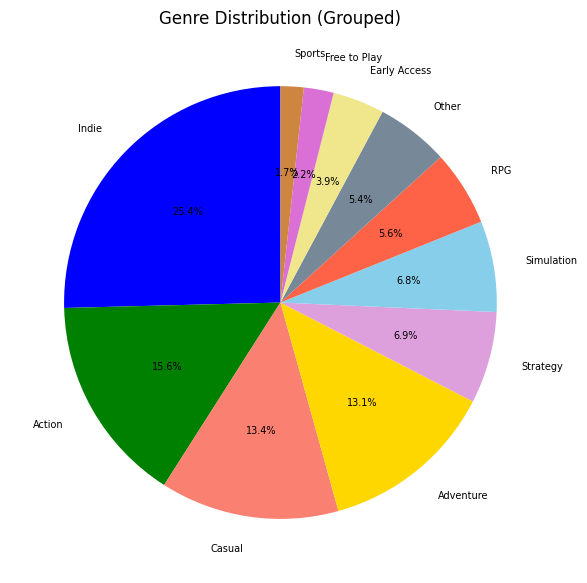

In [143]:
numeric_df = df.drop('appid', axis=1)
print(numeric_df.describe().round(2))

# Split by semicolon and expand into multiple rows
df_exploded = df.assign(genres=df['genres'].str.split(';')).explode('genres')
genre_counts = df_exploded['genres'].value_counts()


genres_to_keep = genre_counts[genre_counts >= 1200].index
df_exploded['genres_grouped'] = df_exploded['genres'].where(
    df_exploded['genres'].isin(genres_to_keep),
    other='Other'
)

grouped_counts = df_exploded['genres_grouped'].value_counts()

grouped_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    figsize=(6, 6),
    title='Genre Distribution (Grouped)',
    colors=colors,
    labeldistance=1.15,
    textprops={'fontsize': 7, 'color': 'black'}
)
plt.ylabel('')
plt.tight_layout()
plt.show()

